# DLA Cluster

Implementation of Diffusion Limited Aggregation(DLA) cluster. http://wiki.cs.umt.edu/classes/cs477/index.php/DLA_Assignment

In [2]:
import numpy as np
from time import sleep
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
class DLA:

    def __init__(self, world_area=61):
        self.L = world_area // 2
        self.lattice = self.lattice = np.zeros((world_area, world_area), dtype=np.int8).tolist()
        self.lattice[self.L][self.L] = 1

        self.num_particles = 1
        self.ring_size = self.L // 10
        self.start_radius = 3
        self.max_radius = self.ring_size + self.start_radius

        self.cycles = 0
        self.complete = False

    def reset(self):
        self.__init__()
        return None

    def iterate(self):
        """
        Iterate through one cycle of adding a particle to the cluster.

        :return: None
        """
        x = 0
        y = 0
        if self.start_radius < self.L:

            theta = 2 * np.pi * np.random.random()
            x = self.L + int(self.start_radius * np.cos(theta))
            y = self.L + int(self.start_radius * np.sin(theta))
            self.walk(x, y)

        else:
            self.complete = True

        self.cycles += 1

        return None

    def walk(self, x, y):
        """
        From position (x,y), randomly walk until you exceed maximum radius or stick to cluster.

        :param x: x coordinate
        :param y: y coordinate
        :return: None
        """

        walking = True

        while walking:
            r_squared = (x - self.L) ** 2 + (y - self.L) ** 2
            r = 1 + int(np.sqrt(r_squared))
            if r > self.max_radius:
                walking = False

            elif r < self.L and (self.lattice[x+1][y] + self.lattice[x-1][y] + self.lattice[x][y+1] + self.lattice[x][y-1] > 0):
                self.num_particles += 1
                self.lattice[x][y] = 1
                if r >= self.start_radius:
                    self.start_radius = r+2
                self.max_radius = self.start_radius + self.ring_size
                walking = False
            else:
                direction = np.random.randint(0,4)
                if direction == 0:
                    x += 1
                elif direction == 1:
                    x -= 1
                elif direction == 2:
                    y += 1
                else:
                    y -= 1

        return None

    def center_of_mass(self):
        """
        Gets current center of mass in lattice coordinates.

        :return tuple: (x, y)
        """
        x, y = np.where(self.lattice == 1)
        x = np.sum(x) // self.num_particles
        y = np.sum(y) // self.num_particles
        return x, y

    def animate(self):
        """
        Iterate through the space until cluster is completely surrounded by dead cells.

        :return: None
        """
        plt.figure()
        while not self.complete:
            self.plot()
            self.iterate()
            sleep(0.01)
            clear_output(wait=True)
        self.plot()

        return None

    def plot(self):
        """
        Plot current lattice configuration.

        :return: None
        """
        plt.figure()
        plt.title("World Size: {}x{}\nIteration: {}\nParticles: {}".format(self.L,
                                                                           self.L,
                                                                           self.cycles,
                                                                           self.num_particles))

        plt.imshow(self.lattice)
        plt.show()

        return None

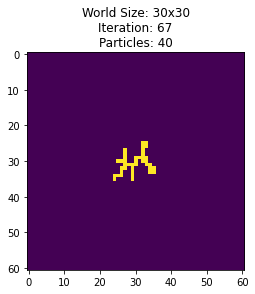

In [ ]:
big_DLA = DLA()
big_DLA.animate()

In [ ]:
big_DLA.num_particles